In [78]:
import pandas as pd
import numpy as np

yoy_dir = "../../results/output_14/yoy"
algorithm = "double-bottom"

In [79]:
df = pd.read_csv(f"{yoy_dir}/yoy_{algorithm}.csv", delimiter=',', index_col=0)
df = df.sort_values(by='year')  # sort from least recent to most recent year
df = df.drop(df.index[-1])  # current year is not complete
display(df)

,performance,ups,downs,limits
year,,,,
1962,0.534483,434,378,473
1963,0.676364,558,267,1096
1964,0.606394,607,394,1418
1965,0.594132,729,498,1226
1966,0.472727,416,464,452
...,...,...,...,...
2018,0.488478,25712,26925,19903
2019,0.558963,28326,22350,24950
2020,0.510105,21807,20943,7753


In [80]:
df_pruned = df.loc[df.index > 1980].copy()
df_pruned.loc[:, "total"] = df_pruned["ups"] + df_pruned["downs"]
display(df_pruned)

,performance,ups,downs,limits,total
year,,,,,
1981,0.533434,2824,2470,1319,5294
1982,0.535720,3202,2775,1369,5977
1983,0.577837,3916,2861,1646,6777
1984,0.519707,4114,3802,2852,7916
1985,0.580561,8464,6115,6703,14579
1986,0.563820,8914,6896,4471,15810
1987,0.520813,8333,7667,3613,16000
1988,0.542617,9543,8044,7663,17587
1989,0.591190,11112,7684,9043,18796


In [81]:
def load_yoy_results(algorithm):
    df = pd.read_csv(f"{yoy_dir}/yoy_{algorithm}.csv", delimiter=',', index_col=0)
    df = df.sort_values(by='year')  # sort from least recent to most recent year
    df = df.drop(df.index[-1])  # current year is not complete
    df_pruned = df.loc[df.index > 1980].copy()
    df_pruned.loc[:, "total"] = df_pruned["ups"] + df_pruned["downs"]
    years = np.array(df_pruned.index)
    values = np.array(df_pruned["total"].values)
    return years, values

Actual charting starts here

In [82]:
# Step 1 & 2: Load data (assuming your load_yoy_results function returns two lists of integers for years and values respectively)
years, values = load_yoy_results(algorithm)
random_years, random_values = load_yoy_results("random")

In [83]:
# Ensure the years from both algorithms are the same and in the same order
if not np.array_equal(years, random_years):
    raise ValueError("The years returned by the two algorithms don't match.")

# Step 3: Normalize random_values
# Assuming that by normalization, you mean dividing by the sum so that the total is 1
random_normalized = random_values / np.sum(random_values)

# Step 4: Divide values by normalized random_values
adjusted_values = values / random_normalized
normalized_values = adjusted_values / np.max(adjusted_values)

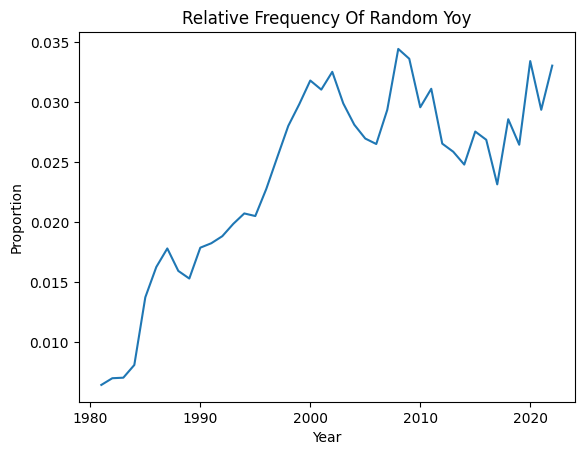

In [84]:
import matplotlib.pyplot as plt

# Plot the performance column against the year column
plt.plot(years,random_normalized)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title(f'Relative Frequency of Random YOY'.title())
plt.savefig(f"./figures/yoy_freq_random.svg", format="svg")

# Show the plot
plt.show()

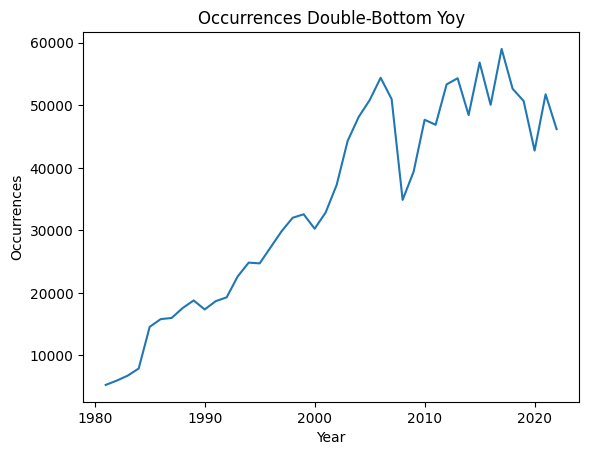

In [85]:
# Plot the performance column against the year column
plt.plot(years,values)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Occurrences')
plt.title(f'Occurrences {algorithm} YOY'.title())
plt.savefig(f"./figures/yoy_occ_{algorithm}.svg", format="svg")

# Show the plot
plt.show()

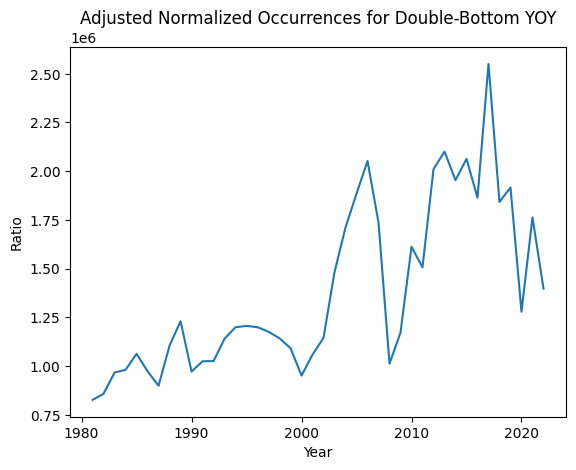

In [86]:
# Plot the performance column against the year column
plt.plot(years, adjusted_values)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.title(f'Adjusted Normalized Occurrences for {algorithm.title()} YOY')
plt.savefig(f"./figures/yoy_norm_{algorithm}.svg", format="svg")

# Show the plot
plt.show()

In [87]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(years, normalized_values)

print("Double Bottom YoY Count")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-value (correlation coefficient): {r_value:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard error: {std_err:.4f}")

Double Bottom YoY Count
Slope: 0.0106
Intercept: -20.7084
R-value (correlation coefficient): 0.7629
P-value: 0.0000
Standard error: 0.0014


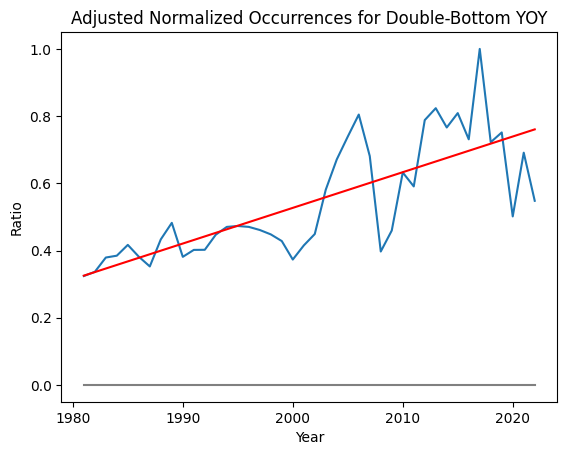

In [88]:
# Plot the performance column against the year column
plt.plot(years, normalized_values)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.title(f'Adjusted Normalized Occurrences for {algorithm.title()} YOY')

# Plot the regression line
regression_line = slope * years + intercept
plt.plot(years, regression_line, color='red')
plt.plot(years, 0 * years, color='gray')
plt.savefig(f"./figures/yoy_trend_{algorithm}.svg", format="svg")

# Display the plot
plt.show()